# Flight Fare Prediction


| Project Case |Stusy Case| Author |
| -- | -- | -- |
| Flight Fare Prediction| India |Adela Farah Aglia |
| | |



---
# Introduction
Jaman sekarang, pesawat merupakan salah satu pilihan transportasi yang disukai karena efektif dari segi waktu. Namun, harga tiket pesawat sering mengalami fluktuasi karena beberapa kondisi. Maka dari itu, author ingin mencari the best model machine learning untuk memprediksi harga pesawat yang nantinya dapat membantu pihak airlines dalam memprediksi berapa harga yang dapat mereka kelola berdasarkan keadaan tertentu.

#Objective
Objective project yang author kerjakan yaitu untuk memprediksi harga pesawat yang ditentukan beberapa parameter/features.
Karena Target/dependent variable yang author inginkan adalah harga(continous numeric value) maka ini termasuk regression problem.


# Data Collection

<h3> <b>Data Source: </b></h3>
Author memakai Data Airlines yang tersedia di platform Kaggle </br>
Source: https://www.kaggle.com/absin7/airlines-fare-prediction</br>

<h4>Deskripsi kolom/variabel:</h4>

|Kolom | Deskripsi|
|--|--|
|Airline| Nama Maskapai|
|Date_of_Journey| Tanggal Keberangkatan|
| Source | Lokasi Keberangkatan|
| Destination | Lokasi Kedatangan/tujuan|
| Route | Informasi tentang lokasi awal dan akhir perjalanan|
| Dep_Time| Waktu keberangkatan penerbangan dari lokasi awal |
| Arrival_Time | Waktu kedatangan penerbangan di tempat tujuan |
| Durasi | Durasi perjalanan dalam jam/menit |
| Total_stop | Jumlah total stop penerbangan sebelum mendarat di lokasi tujuan|
| Additional_info | Informasi tambahan tentang penerbangan|
| Price | Harga penerbangan |


# Imported Library

In [146]:
# Imported Library
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
import re

# Plotting Usage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotting usage plotly package
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [147]:
!git clone https://github.com/AdelaFarah13/Data-Source.git

fatal: destination path 'Data-Source' already exists and is not an empty directory.


# Read Dataset

In [148]:
train_data= pd.read_csv('https://raw.githubusercontent.com/AdelaFarah13/Data-Source/main/Project%20Final%20Test/Data_Train.xlsx%20-%20Sheet1.csv')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [149]:
#Check shape of train_data
train_data.shape

(10683, 11)

Pada dataset yang telah kita kumpulkan, mempunyai **10.683 baris** dan **11 kolom**.

# Data Exploration

In [150]:
# Mini Exploration Analysis with pandas profilling

profile = ProfileReport(train_data, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pada bagian'Overview' dari report pandas profilling memberikan informasi sederhana tentang dataset yang kita gunakan. Untuk data yang sekarang kita gunakan kita mendapatkan beberapa informasi, yaitu:

Jumlah Variabel : 11
Jumlah Baris : 10.683
Jumlah Kategorikal fitur : 10 
Jumlah Numerical fitur : 1
*Missing Value* : 2
*Duplicate row* : 195

## Descriptive Statistics

In [151]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Pre-processing

## Check Missing Value

In [152]:
import missingno

In [153]:
(train_data.isna().sum()/train_data.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

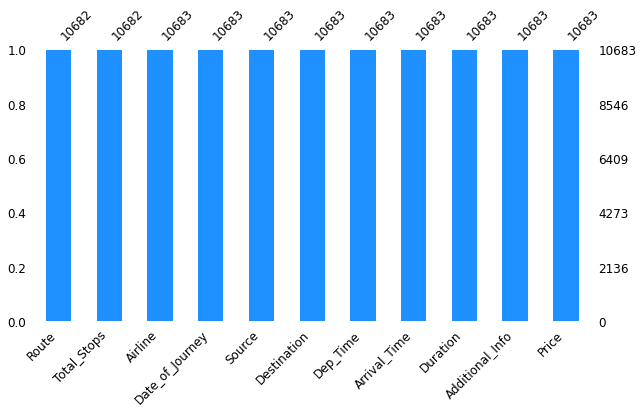

In [154]:
# Airlines dataset Missing Data Bar Chart
missingno.bar(train_data, color='dodgerblue', sort="ascending", figsize=(10,5), fontsize=12)

Di atas ini auhtor memplot jumlah nilai per kolom dan mengabaikan missing value pada dataset Airlines. Hasilnya Kolom yang mempunyai missing value adalah Route dan Total_Stops

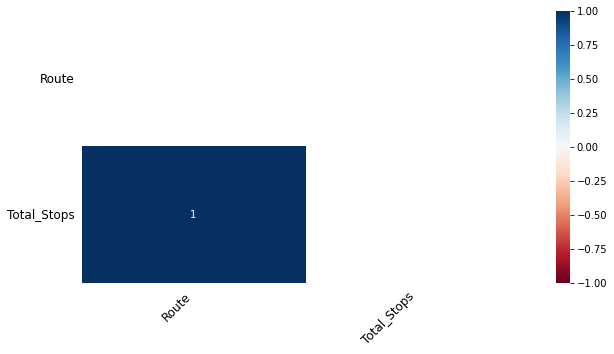

In [155]:
# Airlines Dataset Missing Data Heatmap
missingno.heatmap(train_data, figsize=(10,5), fontsize=12)

Plot heatmap akan menunjukan korelasi antara kolom/feature yang memiliki missing value. 

Kita dapat melihat dari dataset bahwa Total_stops dan Route memiliki korelasi `1` → $\color{red}{\text{Positive Correlation/ High Correlation}}$ Artinya jika Nilai kolom 'Route' hilang maka Nilai kolom 'Total_stops' juga menghilang.

#### Drop Missing value

Karena jumlah Missing pada kolom 'Route' dan 'Total_stops' adalah 0.0094%, author memilih untuk drop nilai yang hilang.

In [156]:
# Membuang nilai NaN pada dataset
train_data.dropna(inplace= True)

In [157]:
#check again missing value
train_data.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Handling Date and Time Variables

In [158]:
#Cheking data type for train_data dataset
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

*as we see*, terdapat beberapa kolom yang tidak memiliki tipe data yang sesuai, seperti:


*   kolom `Date_of_Journey`, `Dep_Time`, `Arrival_Time` dari Object harus diubah menjadi tipe datetime
*   Kolom `Duration` harus diubah menjadi numeical

Kita dapat melakukan Future Engineering pada kolom tersebut



In [159]:
#Merubah struktur tipe data yang tidak sesuai dengan variablenya.

#Membuat fungsi
def change_into_datetime(col):
  train_data[col]=pd.to_datetime(train_data[col])

In [160]:
columns =['Date_of_Journey','Dep_Time','Arrival_Time']

for i in columns:
  change_into_datetime(i)

In [161]:
#Check kembali kolom yang telah kita ubah data type nya
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Feature Engineering column Date of Joruney

In [162]:
# Kolom Date of Journey di split untuk tahap machine learning memahami apa sebenarnya isi kolom journey

train_data['Day_Journey'] = train_data['Date_of_Journey'].dt.day
train_data['Month_Journey'] = train_data['Date_of_Journey'].dt.month

In [163]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_Journey,Month_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-14 05:50:00,2021-10-14 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-10-14 18:05:00,2021-10-14 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-10-14 16:50:00,2021-10-14 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [164]:
# Drop kolom Date of Journey

train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [165]:
#================================================================================================================
# Kolom Dep_time dan Arrival_Time
# Tujuan : Mengambil Jam dan Menit dari masing-masing kolom
#================================================================================================================

def extract_hour(df,column):
  for col in column:
    df[col+'_hour']=df[col].dt.hour

def extract_min(df,column):
  for col in column:
    df[col+'_minute']=df[col].dt.minute

#================================================================================================================
# Kolom Duration
# Problem → Format masih berantakan, maka dari itu author akan menyamakan formatnya.
# Jika Duration hanya bernilai 19h (jam saja) maka akan kita ubah menjadi 19h 0 m
# Jika Duration hanya bernilai 30m (menit saja) maka akan kita ubah menjadi 0h 30m
#================================================================================================================

# Split terlebih dahulu nilai dari kolom Duration
def split_column(df,col):
  #duration = list(df[col])

  for i in range(len(df[col])):
      if len(df[col].iloc[i].split(' ')) == 2:
          pass
      else:
          if 'h' in df[col].iloc[i]:
            df[col].iloc[i]= df[col].iloc[i] + ' 0m'
            #duration[i] +' '+'0m'
          else:
            df[col].iloc[i] = '0h ' + df[col].iloc[i]

# Hanya mengambil angka jam saja
def hour_duration(x):
    return x.split(' ')[0][0:-1]

# Hanya mengambil angka menit saja
def minute_duration(x):
    return x.split(' ')[1][0:-1]
    
#================================================================================================================
# Function untuk menghapus kolom
#================================================================================================================
def drop_column(df,column):
  for col in column:
    df.drop(col,axis=1, inplace=True)

### Feature Engineering of column Dep_Time and Arrival_Time

In [166]:
# Meng ekstraksi jam dan menit pada kolom Dep_Time dan Arrival_Time
extract_hour(train_data, ['Dep_Time','Arrival_Time'])
extract_min(train_data, ['Dep_Time','Arrival_Time'])

# Drop kolom Dep_Time dan Arrival_time
drop_column(train_data, ['Dep_Time','Arrival_Time'])

In [167]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


### Feature Engineering of column Duration

In [168]:
# Split column Duration
split_column(train_data, 'Duration')

In [169]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [170]:
#Column Duration apply function
train_data['Duration_hours'] = train_data['Duration'].apply(hour_duration).astype(int)
train_data['Duration_minute'] = train_data['Duration'].apply(minute_duration).astype(int)

In [171]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,45


In [172]:
#Drop column Duration
drop_column(train_data,['Duration'])

In [173]:
#Check Again datatype each columns
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Day_Journey             int64
Month_Journey           int64
Dep_Time_hour           int64
Arrival_Time_hour       int64
Dep_Time_minute         int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_minute         int64
dtype: object

In [174]:
# Pisahkan kolom yang termasuk Categorical data

categorical_col = [col for col in train_data.columns if train_data[col].dtype=='object']
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [175]:
# Pisahkan kolom yang termasuk Numerical Data
continous_col = [col for col in train_data.columns if train_data[col].dtype!='object']
continous_col

['Price',
 'Day_Journey',
 'Month_Journey',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minute']

## Handle Categorical Data & Future Encoding

Untuk melakukan permodelan Machine Learning kita perlu mengkonversi data kategorikal menjadi angka yang dimengerti oleh mesin.

Diatas kita telah melakukan pemisahan Kolom yang bersifat kategorikal dan kolom yang bersifat Numerikal. 

Kolom kategorikal yang punya yaitu : 'Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'

Pada tahap ini kita akan menentukan kolom tersebut akan dikonversi secara Onehot Encoding atau Label Encoder


In [176]:
# Create new dataframe for categorical data

categorical= train_data[categorical_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


#### Column Airline





In [177]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [178]:
# Melihat Hubungan Airline terhadap harga pesawat
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Airline',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Airline VS Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

<h4> Get Insight: </h4>

`Jet Airways Business` mempunyai range harga penerbangan yang paling tinggi dibandingkan dengan maskapai airline lainnya hampir mempunyai range harga yang sama. Karena Maskapai Jet Airway Business merupakan tipe class yang exlusive sehingga harganya jauh lebih tinggi dibandingkan dengan tipe class yang lainnya.

Pada kolom `Airline` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki/order yang artinya termasuk **Nominal Categorical Data**

In [179]:
# melakukan LabelEncoder pada kolom Airline
Airline = pd.get_dummies(categorical[['Airline']],drop_first=True)

In [180]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### Column Source

In [181]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [182]:
# Check Distribution Source VS Price
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Source',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Source VS Price',
        x=0.5,
        xanchor='center'
    )
)

<h4> Get Insight </h4>

Kota Bangalore merupakan ibu kota dari Negara bagian Karnata, India dan mempunyai perubahan yang paling tinggi dalam naik turunnya harga pesawat.

Kota Delhi merupakan ibu kota dari Negara India mempunyai nilai median yang paling besar dibandingkan kota lainnya di India.

Pada kolom `Source` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki atau order dan memiliki nilai unique yang rendah(hanya da 4)

In [183]:
# melakukan LabelEncoder pada kolom Source
Source = pd.get_dummies(categorical[['Source']],drop_first=True)

In [184]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Column Destination

In [185]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [186]:
# Check Distribution Destination VS Price
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Destination',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Distribution Destination vs Price',
        x=0.5,
        xanchor='center'
    )
)

<h4> Get Insight </h4>

Kota New Delhi merupakan pusat administrasi Negara India menjadi kota yang mempunyai harga yang paling tinggi dan fluktuasi dibandingkan dengan destinasi kota lainnya di India.

Sementara penerbangan yang menuju ke kota Delhi mempunya fluktuasi paling rendah dan Destinasi Kota Hyderabad mempunyai nilai yang paling kecil.

Pada kolom `Destination` author akan menggunakan OneHot Encoder karena kolom ini tidak mempunyai hirarki atau order dan memiliki nilai unique yang rendah(hanya ada 6)

In [187]:
# melakukan encode pada kolom Destination
Destination = pd.get_dummies(categorical[['Destination']],drop_first=True)

In [188]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### Column Route

In [190]:
# Split kolom Route dengan memisahkan symbol →

categorical['Route'].str.split('→') #alt+▼+26 -> →

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [191]:
# Membuat kolom Baru sesuai dengan jumlah titik Route
categorical['Route_1'] =categorical['Route'].str.split('→').str[0]
categorical['Route_2'] =categorical['Route'].str.split('→').str[1]
categorical['Route_3'] =categorical['Route'].str.split('→').str[2]
categorical['Route_4'] =categorical['Route'].str.split('→').str[3]
categorical['Route_4'] =categorical['Route'].str.split('→').str[4]

In [192]:
# Mengecek kolom yang baru ditambahkan pada dataset Categorikal
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

In [193]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN


In [194]:
# Mengisi nilai nan pada kolom Route
for i in ['Route_2', 'Route_3', 'Route_4']:
    categorical[i].fillna('None', inplace=True)

In [195]:
# Delete column Route because not necesarry
drop_column(categorical,['Route'])

In [196]:
#Checking Missing Value
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
dtype: int64

In [197]:
for i in categorical.columns:
  print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 6 categories


Dengan ini kita ketahui setiap feature mempunyai banyak feature lagi, terutama pada feature route 2, route 3.

Artinya untuk menyelasikan issue ini dengan melakukan onehot encoding tidaklah tepat. Mari kita coba dengan label encorder

In [198]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4']:
 categorical[i] =  encoder.fit_transform(categorical[i])

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,5


feature root berhasil di converted

#### Kolom Additional Info

In [ ]:
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Karena banyak value yang berisi no information maka author memutuskan untuk menghapus kolom ini

In [ ]:
drop_column(categorical, ['Additional_Info'])

#### Columns Total Stop

In [ ]:
# Melihat Hubungan Total_Stop terhadap harga pesawat
fig = px.box(train_data.sort_values('Price', ascending= False),
             x='Total_Stops',
             y='Price',)

fig.update_layout(
        title =dict(
        text = 'Boxplot of Total Stops by Price',
        x=0.5,
        xanchor='center'
    )
)
fig.show()

In [ ]:
1 stop memiliki outlier tertinggi dari padah total stop yang lain.

artinya perjalanan yang mempunyai one stop mungkin mempunyai higher fare(biaya) dari pada yang lain.

Pada penerbangan 4 stops kita bisa melihat tidak adanya perubahan naik-turunnya harga secara dramatis seperti penerbangan lainya.

In [ ]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dict_ttl_stop={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}

In [ ]:
categorical['Total_Stops']= categorical['Total_Stops'].map(dict_ttl_stop)

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,0,0,13,29,5
1,Air India,Kolkata,Banglore,1,2,25,1,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5
3,IndiGo,Kolkata,Banglore,2,2,34,3,5
4,IndiGo,Banglore,New Delhi,2,0,34,8,5


#### Concate all columns

In [ ]:
data_train_clean= pd.concat([categorical,Airline,Source,Destination,train_data[continous_col]],axis=1)

In [ ]:
data_train_clean.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,1,2,25,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,2,2,34,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,2,0,34,8,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,45


In [ ]:
# Drop column categorical
drop_column(data_train_clean,['Airline','Source','Destination'])

In [ ]:
data_train_clean.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,0,0,13,29,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,50
1,1,2,25,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,25
2,1,3,32,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,0
3,2,2,34,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,25
4,2,0,34,8,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,45


## Analysis Correlation

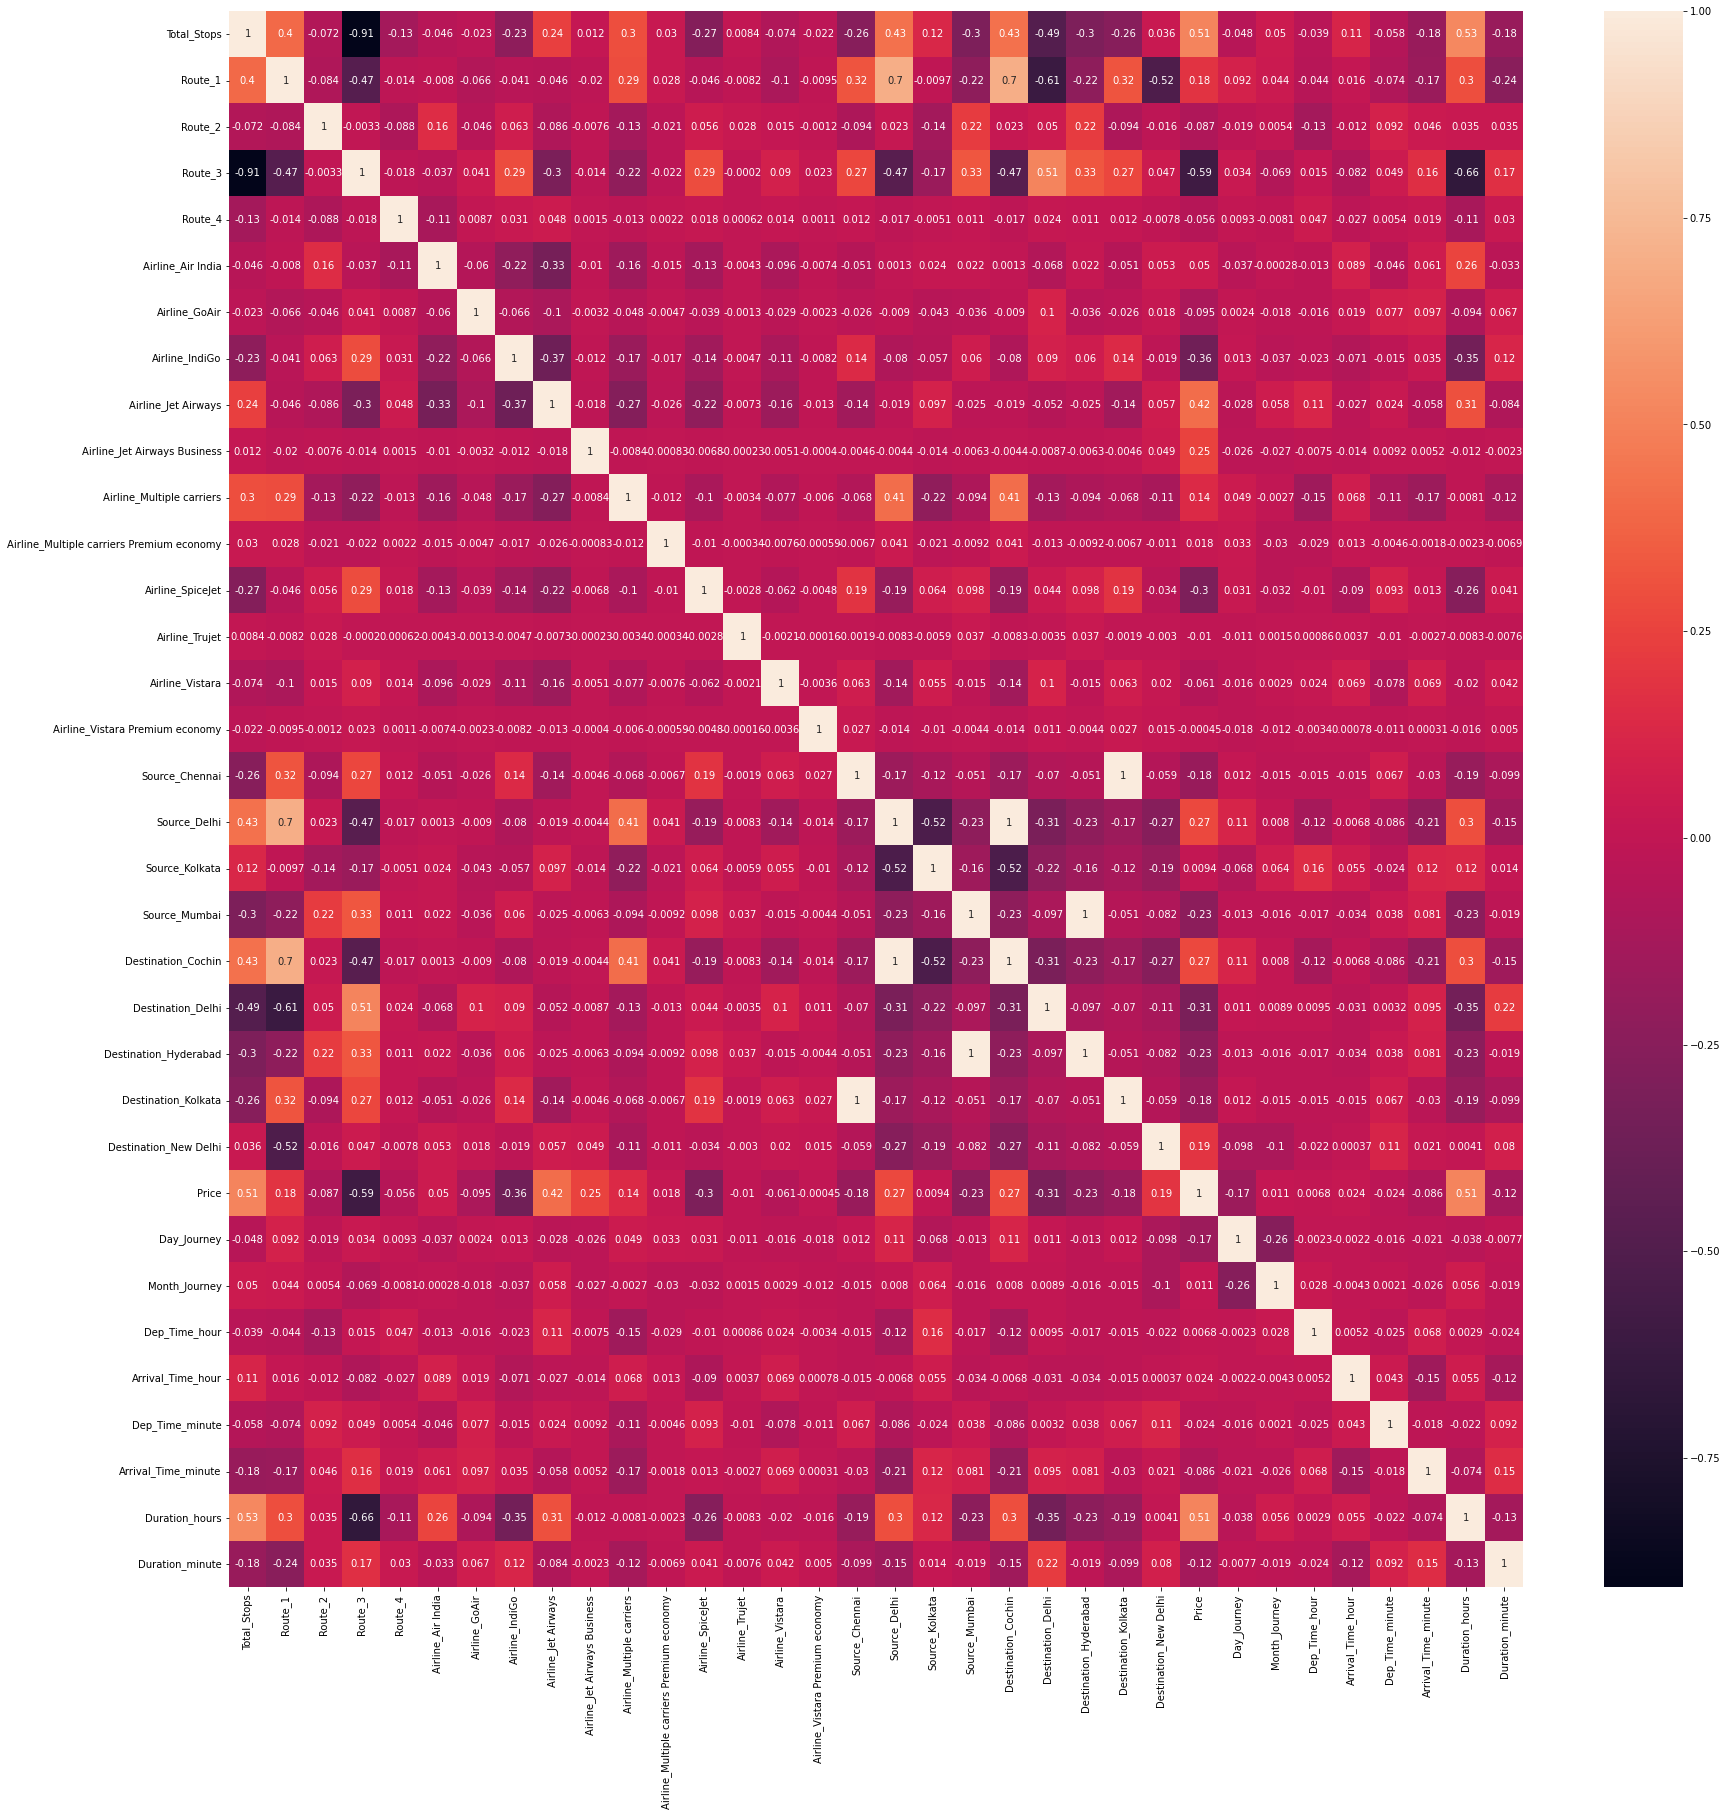

In [ ]:
plt.figure(figsize = (29,29))
sns.heatmap(data_train_clean.corr(), annot = True, linecolor="red", cbar=True)

plt.show()

## Handling Outlier

In [ ]:
def plot(df,col):
  fig, (ax1, ax2) = plt.subplots(2,1)
  sns.distplot(df[col], ax=ax1)
  sns.boxplot(df[col], ax=ax2)

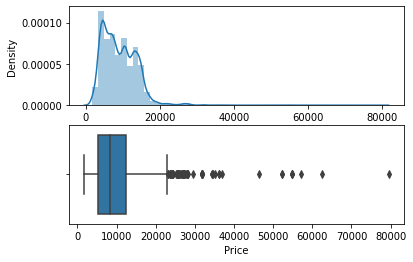

In [ ]:
plot(data_train_clean,'Price')

Grafik Distribusi pada kolom price:
Terlihat positif Skewed distribution

Grafik boxplot: Terlihat ada outlier.

Jika kita membuat suatu asumsi jika harga di atas 4000 sudah pasti outlier data -> perlu di analisis lagi

In [ ]:
data_train_clean['Price']=np.where(data_train_clean['Price']>=40_000, data_train_clean['Price'].median(),data_train_clean['Price'])

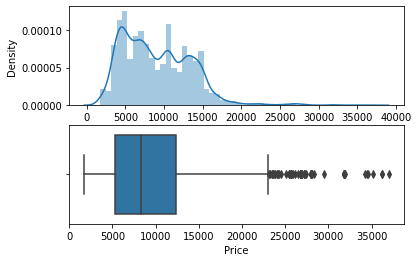

In [ ]:
# After handle outlier
plot(data_train_clean,'Price')

## Split data dependent and independent feature

In [ ]:
data_train_clean.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,0,0,13,29,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,22,1,20,10,2,50
1,1,2,25,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,13,50,15,7,25
2,1,3,32,4,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,9,4,25,25,19,0
3,2,2,34,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,18,23,5,30,5,25
4,2,0,34,8,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,16,21,50,35,4,45


In [ ]:
X = data_train_clean.drop('Price',axis=1)
y = data_train_clean['Price']

## Selecting Feature

aims to get the best feature for countribute most and has a good relationship with the target variable

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(X,y)

array([2.13145388, 2.05492131, 2.81359983, 2.3012502 , 0.75322494,
       0.76547311, 0.09050995, 0.67922149, 0.93721443, 0.        ,
       0.56677854, 0.        , 0.31065089, 0.        , 0.21978722,
       0.        , 0.1712974 , 1.52847495, 0.88880858, 0.29516162,
       1.52832926, 0.39857629, 0.29609754, 0.17167769, 0.37472158,
       1.07527426, 0.86161494, 1.45368495, 1.85670654, 1.20130627,
       1.52890612, 1.77396333, 1.0671987 ])

In [ ]:
imp =pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

In [ ]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.787226
Route_3,2.254586
Total_Stops,2.177841
Route_1,2.041855
Arrival_Time_hour,1.849348
Duration_hours,1.796341
Destination_Cochin,1.533132
Source_Delhi,1.516696
Arrival_Time_minute,1.516284
Dep_Time_hour,1.442818


# Modeling

Cari model ML yang paling feat

Split our data to data train and data test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
from sklearn import metrics
import pickle

cari penjelasannya

In [ ]:
from google.colab import drive
drive.mount('/content/drive')\

Mounted at /content/drive


In [ ]:
X_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_Journey,Month_Journey,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
10005,2,3,7,6,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,5,8,19,30,15,10,45
3684,2,3,7,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,5,9,11,12,30,35,25,5
1034,2,3,33,6,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,24,4,15,22,45,5,6,20
3909,2,3,7,6,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,3,12,1,50,35,12,45
3088,1,3,20,4,5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,24,6,17,19,15,15,26,0


In [ ]:
def predict(ml_model,dump):
  
  random_seed = np.random.seed(123)

  model = ml_model.fit(X_train,y_train)
  print('Training score: {}'.format(model.score(X_train,y_train)))
  
  y_prediction = model.predict(X_test)
  print('prediction are:\n {}'.format(y_prediction))
  print('\n')

  r2_score = metrics.r2_score(y_test,y_prediction)
  print('r2 score is {}'.format(r2_score))

  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  sns.distplot(y_test-y_prediction)

  #plt.scatter(y_test,y_prediction)

  if dump == 1:
    file = open('/content/Data-Source/Project_Final_Test/model.pxl','wb')
    pickle.dump(model,file)

## CatBoost Regressor	

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.4 MB 35 kB/s 


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor

#CatBoostRegressor()

Learning rate set to 0.057463
0:	learn: 4181.3262468	total: 48.8ms	remaining: 48.8s
1:	learn: 4036.1524413	total: 51.6ms	remaining: 25.7s
2:	learn: 3894.6820814	total: 53.9ms	remaining: 17.9s
3:	learn: 3760.7890642	total: 55.9ms	remaining: 13.9s
4:	learn: 3640.6989735	total: 58.2ms	remaining: 11.6s
5:	learn: 3524.9539899	total: 60.4ms	remaining: 10s
6:	learn: 3422.0040854	total: 62.6ms	remaining: 8.88s
7:	learn: 3327.9653797	total: 64.7ms	remaining: 8.02s
8:	learn: 3234.5398462	total: 67ms	remaining: 7.38s
9:	learn: 3151.9731632	total: 69.2ms	remaining: 6.85s
10:	learn: 3076.0678369	total: 71.3ms	remaining: 6.41s
11:	learn: 3004.8292531	total: 73.7ms	remaining: 6.06s
12:	learn: 2942.6852486	total: 75.9ms	remaining: 5.76s
13:	learn: 2879.4224640	total: 78.1ms	remaining: 5.5s
14:	learn: 2820.3475109	total: 80.3ms	remaining: 5.27s
15:	learn: 2768.1141176	total: 82.4ms	remaining: 5.07s
16:	learn: 2724.6767355	total: 84.7ms	remaining: 4.89s
17:	learn: 2679.4530940	total: 87ms	remaining: 4.7

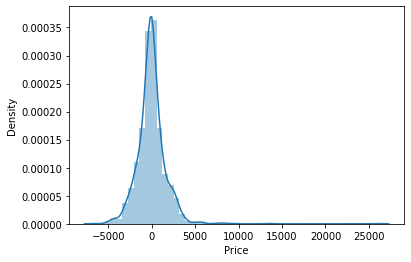

In [ ]:
predict(cb.CatBoostRegressor(),0)

## Random Forest default Parameter

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.952643508243746
prediction are:
 [16726.25        6086.97        8684.51       ...  6792.96
 12715.21166667 12965.682     ]


r2 score is 0.8316676603641033
MAE: 1143.890864917981
MSE: 3447407.7909096708
RMSE: 1856.7196317456414


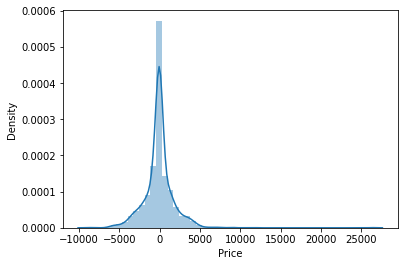

In [ ]:
predict(RandomForestRegressor(),0)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score: 0.5934873315354487
prediction are:
 [12049.15907497  8327.50784375  9488.07024349 ...  7271.68840527
 11034.19814076 11527.9504819 ]


r2 score is 0.5913733988727934
MAE: 2016.3462157606696
MSE: 8368579.2720869845
RMSE: 2892.849680174721


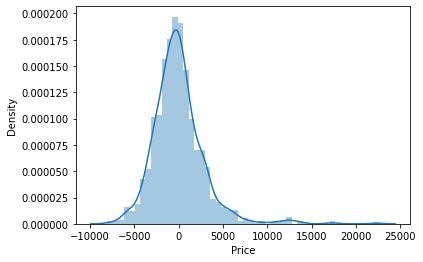

In [ ]:
predict(LinearRegression(),0)

## Decision Tree Regreesion

Training score: 0.9656605025637307
prediction are:
 [16840.  4959.  9187. ...  7452. 13339. 14335.]


r2 score is 0.7501462477388428
MAE: 1313.6957884885353
MSE: 5116947.664342017
RMSE: 2262.067121979809


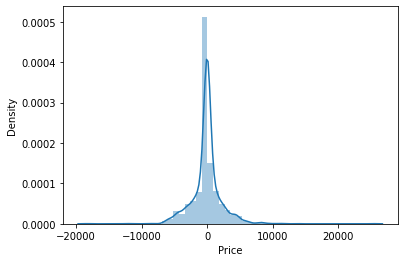

In [ ]:
predict(DecisionTreeRegressor(),0)

## KNeighbors Regressor

KNN ga cocok kalo datanya besar

Training score: 0.7766716576901727
prediction are:
 [16315.   5158.2  8441.6 ...  6471.8  7140.  11467.6]


r2 score is 0.6427567888350068
MAE: 1771.211230697239
MSE: 7316259.205353299
RMSE: 2704.8584446054288


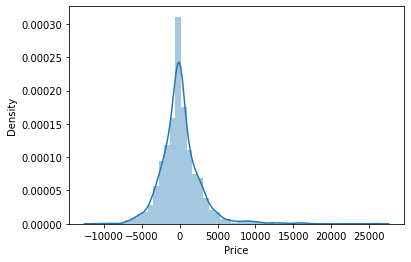

In [ ]:
predict(KNeighborsRegressor(),0)

## Auto ML Regression Python

In [ ]:
!pip install plotly
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install pycaret

     |████████████████████████████████| 266 kB 29.1 MB/s 
     |████████████████████████████████| 2.0 MB 41.5 MB/s 
     |████████████████████████████████| 271 kB 46.7 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 14.6 MB 124 kB/s 
     |████████████████████████████████| 261 kB 44.1 MB/s 
     |████████████████████████████████| 6.8 MB 40.9 MB/s 
     |████████████████████████████████| 1.3 MB 56.8 MB/s 
     |████████████████████████████████| 167 kB 58.0 MB/s 
     |████████████████████████████████| 1.7 MB 38.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 111 kB 64.9 MB/s 
     |████████████████████████████████| 3.1 MB 50.3 MB/s 
     |████████████████████████████████| 102 kB 12.1 MB/s 
     |█████████████████

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(train_data, 
          target = 'Price', 
          train_size = 0.8,
          multicollinearity_threshold = 0.8,
          remove_multicollinearity=True)

ImportError: ignored

In [ ]:
# compare all models
best = compare_models()

Ensemble learning -> setiap model punya kelemahan, agar bisa menutupi satu sama lain.

## Validate Model